In [62]:
#import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("/Users/tsebaotshewarega/Downloads/archive (1)/diabetes_binary_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
print(df.dtypes)
df.describe()

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [360]:
df["HvyAlcoholConsump"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    0.0
Name: HvyAlcoholConsump, Length: 253680, dtype: float64

In [7]:
df.groupby(["Diabetes_binary"]).size()

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64

**Notes on EDA**

- no NA values 
- GenHlth (1 is Excellent -> 5 is Poor)
- MentHlth , this is in days(0-30);  0 -> (no bad mental health days)
- PhysHlth, also in days (0-30); 0 -> (no bad mental health days)
- Sex, Male is 1, female is 0
- Age, 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments
      [18, 24], [25, 29], [30, 34], [35, 39], [40, 44], [45, 49], [50, 54], [55, 59], [60, 64], [65, 69],[70,74],[75, 79], [80 and above]
- Education (1-6) 1 (never attended school or kindergarten only) --> 6 (college 4 years or more)
- Income (1 -8), 1 (less than $10,000) ->  8 (being $75,000 or more)

In [9]:
predictors = df.drop(columns=['Diabetes_binary'])

# Fitting OLS model
lm_fit = sm.OLS(df['Diabetes_binary'], predictors).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Diabetes_binary   R-squared (uncentered):                   0.273
Model:                            OLS   Adj. R-squared (uncentered):              0.273
Method:                 Least Squares   F-statistic:                              4539.
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        19:26:01   Log-Likelihood:                         -69505.
No. Observations:              253680   AIC:                                  1.391e+05
Df Residuals:                  253659   BIC:                                  1.393e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.0827      0.001     56.531      0.000       0.080       0.086
HighChol                 0.0597      0.001     43.221      0.000       0.057       0.062
CholCheck               -0.0162      0.003     -5.211      0.000      -0.022      -0.010
BMI                      0.0050   9.24e-05     53.848      0.000       0.005       0.005
Smoker                  -0.0128      0.001     -9.715      0.000      -0.015      -0.010
Stroke                   0.0370      0.003     11.119      0.000       0.030       0.044
HeartDiseaseorAttack     0.0731      0.002     31.262      0.000       0.069       0.078
PhysActivity            -0.0173      0.002    -11.069      0.000      -0.020      -0.014
Fruits                  -0.0050      0.001     -3.612      0.000      -0.008      -0.002
Veggies                 -0.0110      0.002     -6.511      0.000      -0.014      -0.008
HvyAlcoholConsump       -0.0553      0.003    -19.930      0.000      -0.061      -0.050
AnyHealthcare           -0.0241      0.003     -8.149      0.000      -0.030      -0.018
NoDocbcCost             -0.0248      0.002    -10.329      0.000      -0.030      -0.020
GenHlth                  0.0378      0.001     49.860      0.000       0.036       0.039
MentHlth                -0.0008   9.47e-05     -8.929      0.000      -0.001      -0.001
PhysHlth                 0.0003   9.22e-05      2.905      0.004     8.7e-05       0.000
DiffWalk                 0.0494      0.002     23.627      0.000       0.045       0.053
Sex                      0.0125      0.001      9.522      0.000       0.010       0.015
Age                      0.0044      0.000     19.150      0.000       0.004       0.005
Education               -0.0172      0.001    -25.734      0.000      -0.018      -0.016
Income                  -0.0083      0.000    -22.247      0.000      -0.009      -0.008
==============================================================================
Omnibus:                    66955.011   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           138779.849
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                       4.707   Cond. No.                         171.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From here on out we'll be trying out different ML models and comparing errors**

In [273]:
#Split the data into training and testing sets
(X_train, X_test, y_train, y_test) = skm.train_test_split(df,
                                                          df['Diabetes_binary'], 
                                                          test_size=0.2, 
                                                          random_state=0)


**Logistics regression**

In [17]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model to the training data
glm_fit = LogisticRegression().fit(X_train, y_train)

# Predict probabilities for the test data
logit_pr = glm_fit.predict_proba(X_test)[:, 1]

# Convert probabilities to class predictions based on a threshold of 0.5
logit_est = np.where(logit_pr > 0.5, 1, 0)

# Calculate misclassification error
misclassification_error = np.mean(logit_est !=  y_test)

# Print misclassification error
print(misclassification_error)

0.0


**Linear Discriminant Analysis (LDA)**

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Fit LDA model to the training data
lda_fit = LDA().fit(X_train, y_train)

# Predict classes for the test data
lda_est = lda_fit.predict(X_test)

# Calculate misclassification error
misclassification_error = np.mean(lda_est != y_test)

# Print misclassification error
print(misclassification_error)

0.1386195206559445


**Quadratic Discriminant Analysis (QDA)**

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Fit QDA model to the training data
qda_fit = QDA().fit(X_train, y_train)

# Predict classes for the test data
qda_est = qda_fit.predict(X_test)

# Calculate misclassification error
misclassification_error = np.mean(qda_est != y_test)

# Print misclassification error
print(misclassification_error)

0.14212787764112267


The logistic regression performs better, this makes sense as the dependent variable is binary. Its linear decision boundary offers simplicity, interpretability, and efficiency for binary classification tasks. **Below we are looking at more sophisticated ML models that will allow us to identify which features are most significant**

**Best Subset Selection**

In [326]:
predictors = X_train.drop(columns = 'Diabetes_binary')

In [338]:
# Assign target variable 'Diabetes_binary' to y
y = df['Diabetes_binary']

# Add a constant column to the predictors matrix Xcons

Xcons = sm.add_constant(predictors)

# Create a DataFrame 'y_df' containing only the target variable 'Diabetes_binary'
y_df = pd.DataFrame({'y': df['Diabetes_binary']}, index=X_train.index)

# Define a function to process a subset of features
def processSubset(feature_set):
    # Fit model on feature_set and calculate rsquared
    if 'const' not in feature_set:
        feature_set = feature_set + ('const',) # mannually add intercept
    model = sm.OLS(y_df,Xcons[list(feature_set)])
    regr = model.fit()
    rsquared = regr.rsquared
    return {"model":regr, "rsquared":rsquared}

In [339]:
import time
import itertools

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(Xcons.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest rsquared
    best_model = models.loc[models['rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [341]:
# Create an empty DataFrame to store the best models and their R-squared values
models_best = pd.DataFrame(columns=["rsquared", "model"])

# Record the start time
tic = time.time()

# Iterate over a range of subset sizes, from 1 to 3
for i in range(1,4):
    models_best.loc[i] = getBest(i)

# Record the end time
toc = time.time()

# Print the total elapsed time for model selection
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 22 models on 1 predictors in 0.9568510055541992 seconds.
Processed 231 models on 2 predictors in 15.162710905075073 seconds.
Processed 1540 models on 3 predictors in 131.43489408493042 seconds.
Total elapsed time: 148.2071008682251 seconds.


In [342]:
print(models_best.loc[3, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        10:56:05   Log-Likelihood:                -57715.
No. Observations:              202944   AIC:                         1.154e+05
Df Residuals:                  202940   BIC:                         1.155e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HighBP         0.1194      0.002     78.055      0.0

In [348]:
best_model = models_best.loc[3, "model"]

# Extract the features used in the best model
feature_names = best_model.model.exog_names

# Prepare the test data with only the selected features
predictors_test = X_test.drop(columns = 'Diabetes_binary')

X_test_const = sm.add_constant(predictors_test)
X_test_subset = X_test_const[feature_names]

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_subset)

# Calculate the mean squared error
test_mse = np.mean((y_test_pred - y_test) ** 2)
print("Test MSE:", test_mse)

Test MSE: 0.10486893538979475


**Forward Selection**

In [351]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in Xcons.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(tuple(predictors+[p])))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest rsquared
    best_model = models.loc[models['rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [354]:
models_fwd = pd.DataFrame(columns=["rsquared", "model"])

tic = time.time()
predictors = []

for i in range(1,3):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  22 models on 1 predictors in 0.9122738838195801 seconds.
Processed  20 models on 3 predictors in 1.2494568824768066 seconds.
Total elapsed time: 2.164048910140991 seconds.


In [355]:
print(models_best.loc[3, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        13:05:16   Log-Likelihood:                -57715.
No. Observations:              202944   AIC:                         1.154e+05
Df Residuals:                  202940   BIC:                         1.155e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HighBP         0.1194      0.002     78.055      0.0

In [356]:
best_model = models_best.loc[3, "model"]

# Extract the features used in the best model
feature_names = best_model.model.exog_names

# Prepare the test data with only the selected features
predictors_test = X_test.drop(columns = 'Diabetes_binary')

X_test_const = sm.add_constant(predictors_test)
X_test_subset = X_test_const[feature_names]

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_subset)

# Calculate the mean squared error
test_mse = np.mean((y_test_pred - y_test) ** 2)
print("Test MSE:", test_mse)

Test MSE: 0.10486893538979475


**Lasso**

In [274]:
# import packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.linear_model as skl

In [361]:
# extracting only the predictor features 
X_train_reg = X_train.iloc[:,1:]
X_test_reg = X_test.iloc[:,1:]

K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [370]:
# Cross-validated tuning of the alpha parameter for Lasso regression
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)

# Construct a pipeline for preprocessing and applying Lasso regression
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])

# Fit the pipeline to the training data to find the best alpha value
pipeCV.fit(X_train_reg, y_train)

# Obtain the best alpha value 
tuned_lasso = pipeCV.named_steps['lasso']
print(f" The best alpha by lasso : {tuned_lasso.alpha_}")

 The best alpha by lasso : 0.0001429438100826323


In [363]:
print(X_train_reg.columns.values)
print(tuned_lasso.coef_)

['HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']
[ 0.03720076  0.02718555  0.00842038  0.0454244  -0.00277712  0.00626605
  0.01908683 -0.00315217 -0.00078589 -0.00069955 -0.01171779  0.00270377
 -0.00143782  0.05069644 -0.0042406   0.00041429  0.01607463  0.00830452
  0.02238209 -0.00301098 -0.01282823]


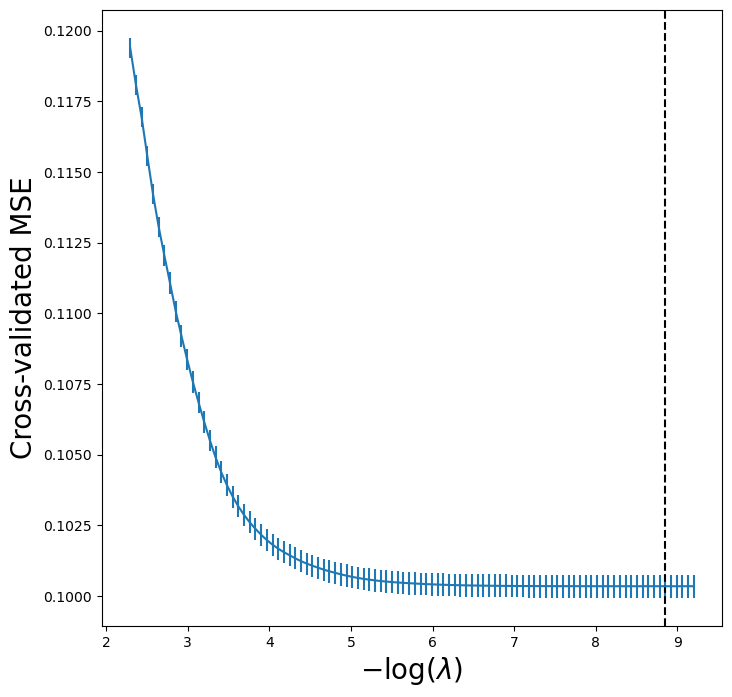

In [364]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [365]:
# Create a Lasso regression model with the tuned alpha value
lasso = skl.ElasticNet(alpha=tuned_lasso.alpha_, l1_ratio=1)

# Standardize the features using StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

# Construct a pipeline for preprocessing and applying Lasso regression
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])

# Fit the pipeline to the training data
pipe.fit(X_train_reg, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', ElasticNet(alpha=0.0001429438100826323, l1_ratio=1))])

In [282]:
# Get the column names and their corresponding coefficients
columns = X_train_reg.columns.values
coefficients = pipe.named_steps['lasso'].coef_

# Create a list of tuples containing column names and their coefficients
coefficients_with_columns = list(zip(columns, coefficients))

# Sort the list based on the absolute values of the coefficients in descending order
sorted_coefficients = sorted(coefficients_with_columns, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted list
for column, coefficient in sorted_coefficients:
    print(f"{column}: {coefficient:.5f}")

GenHlth: 0.05070
BMI: 0.04542
HighBP: 0.03720
HighChol: 0.02719
Age: 0.02238
HeartDiseaseorAttack: 0.01909
DiffWalk: 0.01607
Income: -0.01283
HvyAlcoholConsump: -0.01172
CholCheck: 0.00842
Sex: 0.00830
Stroke: 0.00627
MentHlth: -0.00424
PhysActivity: -0.00315
Education: -0.00301
Smoker: -0.00278
AnyHealthcare: 0.00270
NoDocbcCost: -0.00144
Fruits: -0.00079
Veggies: -0.00070
PhysHlth: 0.00041


In [368]:
test_pred = pipe.predict(X_test_reg)
test_mse = np.mean((y_test - test_pred)**2)

print(f"The test MSE for Lasso is: {test_mse}")

The test MSE for Lasso is: 0.10128555550347751


In [369]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = pipe.predict(X_test_reg)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)

print("Accuracy for Lasso:", accuracy)

Accuracy for Lasso: 0.8597445600756859


**PCR**

In [374]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [375]:
# Define PCA and logistic regression models
pca = PCA(n_components=20) 
logreg = LogisticRegression()

# Create a pipeline with PCA followed by logistic regression
pipe = Pipeline([('pca', pca), ('logreg', logreg)]) 

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Access the coefficients of the logistic regression model
coefficients = pipe.named_steps['logreg'].coef_
coefficients

array([[ 0.14551971,  0.2143008 , -0.05249858, -0.50809335,  0.34405239,
         0.99036819, -1.23364785,  1.71801162,  3.30929246, -1.58204336,
         0.43690442, -1.59475542,  0.19365395, -0.14303868, 14.09632567,
         7.37776855,  0.71044624, -2.16202643,  0.46795868,  0.08105572]])

In [376]:
scaler = StandardScaler(with_mean=True, with_std=True)
logit_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('logit_reg', logit_reg)]) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=20)),
                ('logit_reg', LogisticRegression(max_iter=1000))])

In [377]:
import sklearn.model_selection as skm
from ISLP.models import ModelSpec as MS

K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

param_grid = {'pca__n_components': range(1, 20)} 
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')



# Y = df['Diabetes_binary']
# design = MS(df.columns.drop('Diabetes_binary')).fit(df)
# D = design.fit_transform(df)
# #D = design.drop('intercept', axis=1)
# X = np.asarray(D)

Y = X_train['Diabetes_binary']
design = MS(X_train.columns.drop('Diabetes_binary')).fit(X_train)
D = design.fit_transform(X_train)
#D = design.drop('intercept', axis=1)
X = np.asarray(D)


grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=20)),
                                       ('logit_reg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

In [378]:
# Access the coefficients of the logistic regression model
coefficients = pipe.named_steps['logit_reg'].coef_
coefficients

array([[ 1.61698269, -1.2390038 ,  0.38948507,  1.16308875, -0.41783479,
         1.81895424,  0.49543035,  0.38574221,  0.1087681 ,  0.81161471,
        -1.72550457, -0.7895437 ,  3.43637288, -3.12024769,  1.28772186,
         0.43555025, -0.98664042,  0.22354832, -0.24097197,  0.01158947]])

In [379]:
grid.best_params_

{'pca__n_components': 17}

In [298]:
pca.explained_variance_[:20]

array([3.66074416, 1.79642631, 1.36503082, 1.19977789, 1.16140109,
       1.12364279, 1.03510042, 0.95025405, 0.9226755 , 0.88452325,
       0.81759397, 0.79258422, 0.75869088, 0.74023316, 0.73007283,
       0.71349301, 0.70177602, 0.66649327, 0.55672831, 0.51117726])

In [299]:
pca.explained_variance_ratio_[:20]

array([0.16639664, 0.08165534, 0.06204655, 0.05453509, 0.0527907 ,
       0.05107442, 0.04704979, 0.04319315, 0.04193959, 0.0402054 ,
       0.03716318, 0.03602638, 0.03448578, 0.0336468 , 0.03318497,
       0.03243134, 0.03189875, 0.030295  , 0.02530571, 0.02323522])

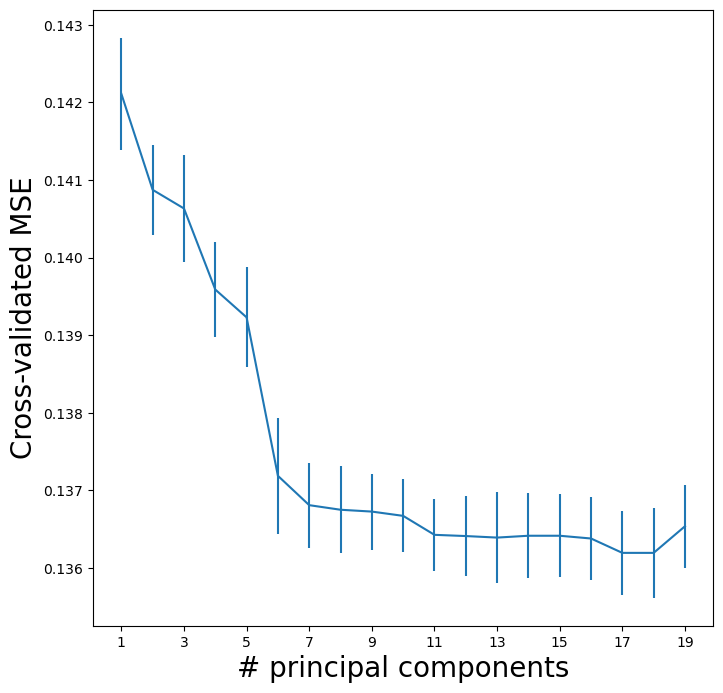

In [300]:
pcr_fig, ax = subplots(figsize=(8,8)) 
n_comp = param_grid['pca__n_components'] 
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K)) 
ax.set_ylabel('Cross-validated MSE', fontsize=20) 
ax.set_xlabel('# principal components', fontsize=20) 
ax.set_xticks(n_comp[::2]);

In [308]:
# Initialize an empty list to store the sums
sums = []
max_components = 20


# Iterate over the range of components
for n in range(1, max_components + 1):
    # Calculate the sum of explained variance ratios for the first n components
    sum_variance_ratio = np.sum(pipe.named_steps['pca'].explained_variance_ratio_[:n])
    sums.append(sum_variance_ratio)

# Create a DataFrame to store the results
components_df = pd.DataFrame({
    'Number of Components': range(1, max_components + 1),
    'Explained Variance Ratios': sums
})

# Print the DataFrame
components_df

,Number of Components,Explained Variance Ratios
0,1,0.166397
1,2,0.248052
2,3,0.310099
3,4,0.364634
4,5,0.417424
5,6,0.468499
6,7,0.515549
7,8,0.558742
8,9,0.600681
9,10,0.640887


In [306]:
from sklearn.metrics import mean_squared_error

# Get the best model from the grid search
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Test MSE: 0.13753547776726585
